# Chapter 2: Some Technical Background

In [4]:
from mlwpy import *
%matplotlib inline

# Chapter 2.4 Probability

We can generate evenly weighted random events using NumPy: `np.random.randint`.    `randint` is designed to mimic Python's indexing semantics, which meanings *including* the starting point and *excluding* the ending point.  

In [5]:
np.random.randint(1, 7)

4

If we want to convince ourselves the numbers are really being generated with equal likelihoods (as with a perfect, fair die), we can draw a chart of the frequency of the outcomes of many rolls.  We will do that in three steps, rolling the die both a few times or many times:

In [7]:
few_rolls = np.random.randint(1, 7, size=10)
many_rolls = np.random.randint(1, 7, size=1000)

We count up how many times each event occurred with `np.histogram`.  Note that `np.histogram` is designed around plotting buckets of continuous values.  Since we want to capture discrete values, we have to create a bucket that surrounds our values of interest.  

<BarContainer object of 6 artists>

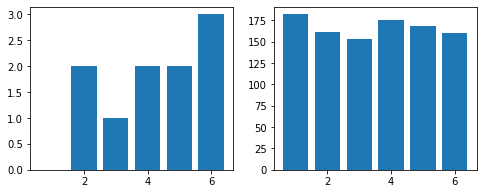

In [8]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1, 7), many_counts)

We may need to add additional examples, rolls in this case, to get a clear picture of the datasets underlying behavior.  `hist`, from `matplotlib`, works well for larger datasets that take a wider range of values, but it ends up obfuscating the simple case of a few discrete values. 

<BarContainer object of 6 artists>

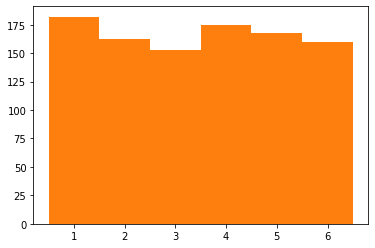

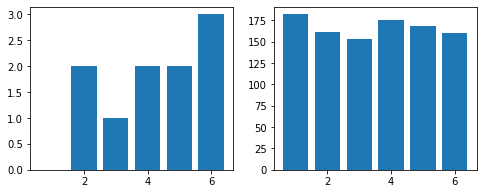

In [11]:
few_counts = plt.hist(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = plt.hist(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1, 7), many_counts)

# 2.4.4 Distributions

There are many different way s to assign probabilities to events.  Some of them are based on direct, real-world experiences like dice and cards.  Others are based o nhypothetical scenarios.  The mapping between events and probabilities is a *probability distribution.*

When a group of events shares a common probability value, we call it a *uniform distribution.*

(0.0, 55.0)

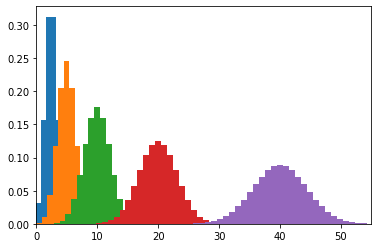

In [12]:

import scipy.stats as ss

b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
    # binomial with .5 is result of many coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
    
plt.xlim(0, 55)


We can smooth the graph out using the following example:

(0.0, 55.0)

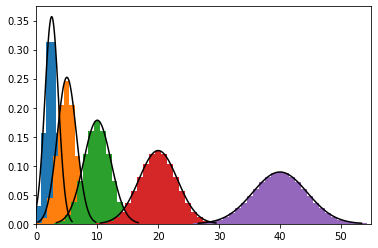

In [14]:
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    # binomial coin flips
    # arange returns evenly spaced values within a given interval range
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
    
    # normal approximation to that binomial
    # we have to set the mean and standard deviation
    mu = flips *.5,
    std_dev = np.sqrt(flips *.5 * (1-.5))
    
    # we have to set up both the x and y points for the normal
    # we get the ys from the distribution (a function)
    # we have to feed it xs, we set those up here
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k');
    
plt.xlim(0, 55)

You can liken increasing the coin flips to increasing the accuracy of a measurment, so that we achieve more decimals of accuracy.  The steps become more gradual.  Often, smooth curves are called *bell-shaped curves*.  The specific bell-shpaed curve we are stepping towards is called the *normal distribution.*

The *normal distribution* has three important characteristics:

* It's midpoint has the most likely value--the hump in the middle (i.e., 40/80 heads, 20/40 heads, 10/20 heads)
* It's symmetric and can be mirrored about its midpoint.
* As we move from the midpoint, the values fall off more and more quickly.



# 2.5 Linear Combinations, Weighted Sums, and Dot Products



In [17]:
# pure python, old-school
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
partial_cost = []

for q,c in zip(quantity, costs):
    partial_cost.append(q*c)
sum(partial_cost)

36.25

In [18]:
# pure python, for the new-school, cool kids
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
sum(q*c for q,c in zip(quantity,costs))

36.25

We can do the same thing using NumPy arrays, which offer more benefits:

In [19]:
quantity = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])
np.sum(quantity * costs) # element-wise multiplication

36.25

Also, the calculation can be performed by NumPy with `np.dot`. `dot` multiplies the elements pairwise, selecting the pairs in lockstep down the two arrays, and then adds them up:

In [20]:
print(quantity.dot(costs),     # dot-product way 1
      np.dot(quantity, costs), # dot-product way 2
      quantity @ costs,        # dot-product way 3
                               # (new addition to the family!)
      sep='\n')

36.25
36.25
36.25


There are two things that make the linear combination (expressed in a dot product): (1) we multiply the values pairwise, and (2) we add up all those subresults.  These correspond go (1) a single multiplication to create subtotals for each line on a receipt and (2) adding the subtotals together to fit your final bill.  

Also, you'll see dot product written mathematically (using *q* for `quantity` and *c* for `cost`) as $\Sigma_i q_i c_i$.  The *i* ties the pieces together in lockstep like a sequence index.

More briefly, it says, "add up *all* of the element-wise multiplied *q* and *c*."  This is also called the *sum product* of the quantities and costs.  At our level, we use sum product as a synonym for dot product.

So, combing NumPy on the left-hand side and mathematics on the right-hand side, we have:

`np.dot(quantity,cost)` = $\Sigma_i q_ic_i$

Sometimes that is written as briefly as *qc*.  To emphasize the dot product, we can use a bullet as its symbol: $q \bullet c$.  If you are uncertain about the element-wise or lockstep part, you can use Python's `zip` function to help you out.  It is designed precisely to march, in lockstep, through multiple sequences.

In [21]:
for q_i, c_i in zip(quantity, costs):
    print("{:2d} {:5.2f} --> {:5.2f}".format(q_i, c_i, q_i * c_i))
    
print("Total:",
     sum(q*c for q,c in zip(quantity,costs))) # cool-kid method

 2 12.50 --> 25.00
12  0.50 -->  6.00
 3  1.75 -->  5.25
Total: 36.25


Remember, we normally let NumPy--via `np.dot`--do that work for us!

# 2.5.1 Weighted Average

What is a weighted average?  The simple average, also called the mean, is an equally weighted average computed from a set of values.  For the three values (10, 20, 30), we divide up the weights among the three values and, *presto*, I get thirds: $\frac{10+20+30}{3}$.  Simply do `sum(values)/3`: add them all up and divide by the number of values.

In [22]:
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3) # repeated (1/3)

print('weights:', weights)
print('via mean:', np.mean(values))
print('via weights and dot:', np.dot(weights, values))

weights: [0.3333 0.3333 0.3333]
via mean: 20.0
via weights and dot: 20.0


We can write the mean as a weighted sum--a sum product between values and weights.  If we play around with the weights, we end up with the concept of *weighted averages*.  With weighted averages, instead of using equal portions, we break the portions up any way we choose.  Sometimes, we insist that the portions add up to one.  If we weighted our three values by $\frac{1}{2}, \frac{1}{4}, \frac{1}{4}$.  Why do we do this?  The weights express the idea that the first option is *valued twice as much* as the other two and that the other two are valued equally.  it might also mean that the first one is *twice as likely* in a random scenario.  The two interpretations are close to what we would get if we applied those weights to underlying costs or quantities.  You can view them as two sides of the same double-sided coin. 

In [23]:
values = np.array([10, 20, 30])
weights = np.array([.5, .25, .25])

np.dot(weights, values)

17.5

A special weighted average occurs when the values are the different outcomes of a random scenario and the weights represent the probabilities of those outcomes.  In this case, the weighted average is called the *expected value* of that set of outcomes.  Here's a simple game.  Suppose I roll a standard six-side die and I get \\$1.00 if the die turns out odd and I lose \\$.50 if the die comes up even.  Let's compute a dot product between the payoffs and the probabilities of each payoff.  My expected outcome is to make:

In [24]:
                   # odd, even
payoffs = np.array([1.0,  -.5])
probs   = np.array([ .5,   .5]) 
np.dot(payoffs, probs)

0.25

Mathematically, we write the expected value of the game as E(game) = $\Sigma_i p_iv_i$ with $p$ being the probabilities of the events and $v$ being the values or payoffs of those events.  Now, in any *single* run of that game, I'll *either* make \\$1.00 or lose \\$.50.  However, if I were to play the game, say 100 times, I'd expect to come out ahead by about \\$25.00--the expected gain per game times the number of games.   In reality, the outcome is a *random* event.  Sometimes, better, sometimes, worse.  However, $25.00 is the best guess before heading into a game with 100 tosses.  With many tosses, we're *highly likely* to get *very close* to the expected value.

Here's a simulation of 10000 rounds o f the game.  You can compare the outcome with `np.dot(payoffs, probs) * 10000`.

In [25]:
def is_even(n):
    # if raminder 0, value is even
    return n % 2 == 0

winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1, 7)
    winnings += 1.0 if is_even(die_toss) else -0.5
print(winnings)

2540.5


In [26]:
np.dot(payoffs, probs) * 10000

2500.0

# 2.5.2 Sums of Squares

Another very special, sum-of-products is when both the *quantity* and the *value* are *two copies of the same thing.*  For example, $5 \bullet 5 + (-3) \bullet (-3) + 2 \bullet 2 + 1 \bullet 1$ = $ 5^2 + 3^2 + 2^2 + 1^2 $ = 25 + 9 + 4 + 1 = 39.  This is called the *sum of squares* since each element, multiplied by itself, gives the square of the original value.  The following is how to do that in code:

In [27]:
values = np.array([5, -3, 2, 1])
squares = values * values # element-wise multiplication
print(squares,
     np.sum(squares), # sum of squares. ha!
     np.dot(values, values), sep='\n')

[25  9  4  1]
39
39


Writing this mathematically looks like: `dot(values, values)` = $\Sigma_i v_iv_i$ = $\Sigma_i v_i^2$.

# 2.5.3 Sum of Squared Errors

Another common summation pattern is the sum of squared errors.  In this case of mathematical terminology, the red herring is both *red* and a *herring*.  If i have a known value `actual` and I have a guess to its value `predicted`, I can compute your error with `error = predicted - actual`.  The error is positive or negative based on whether you over- or underestimated the actual value.

By squaring the error, we make all values positive.  If you ask about your total squared error after you've guessed 5 and -5, it will be 25 + 25 = 50.

In [28]:
errors = np.array([5, -5, 3.2, -1.1])
display(pd.DataFrame({'errors':errors,
                      'squared': errors*errors}))

,errors,squared
0,5.0000,25.0000
1,-5.0000,25.0000
2,3.2000,10.2400
3,-1.1000,1.2100


So a squared error is calculated by $error^2 = (predicted - actual)^2$.  We can add these up with $\Sigma_i (predicted_i - actual_i)^2 = \Sigma_i error_i^2$.  The sum reads left to right as, "the sum of (open paren) errors which are squared (close paren)."  More succinctly: the sum of squared errors.  That looks like `dot` we used above:

In [29]:
np.dot(errors, errors)

61.45

Weighted averages and sums of squared errors are probably the most common summation forms in machine learning.  

# 2.6 A Geometric View: Points in Space

## 2.6.1 Lines

Let's say we have 10 (good) friends going to the a show, who can all fit in a minivan, packed in like a clown car, if need be.  The group is going to pay one flat fee for parking.  That's good, because the cost of parking is pretty high: we'll say $40.

Text(0, 0.5, 'Cost\n(parking Only)')

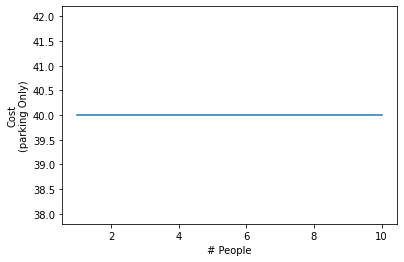

In [31]:
people = np.arange(1, 11)
total_cost = np.ones_like(people) * 40.0

ax = plt.gca()
ax.plot(people, total_cost)
ax.set_xlabel('# People')
ax.set_ylabel('Cost\n(parking Only)')

In math class, we write this as total_cost = 40.0.  That is, regardless of the number of people, moving back and forth along the *x*-axis at the bottom, we pay the same amount.  Here, the height of the *y*-value is equal to *some constant*.  This expression is in the form of *y = c* or *y = 40*.

However, it doesn't do us much good to park at the show and not buy tickets, although there is something to be said for tailgating.  So, what happens if we have to pay $80 per ticket?

In [33]:
people = np.arange(1, 11)
total_cost = 80.0 * people + 40.0
total_cost

array([120., 200., 280., 360., 440., 520., 600., 680., 760., 840.])

Graphing this is a bit more complicated, so let's make a table of the values first:

In [34]:
# .T (transpose) to save vertical space in printout

display(pd.DataFrame({'total_cost':total_cost.astype(np.int)},
                    index=people).T)

,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


Now we can plot that, point-by-point:

Text(0.5, 0, 'People')

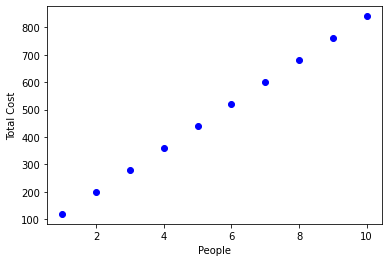

In [35]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo')
ax.set_ylabel('Total Cost')
ax.set_xlabel('People')

So, if we write this in a math class, it would look like:
$ total\_cost = ticket\_cost \times people + parking\_cost $.

Let's compare the two forms--a constant and a line--and the various ways they might be written in Table 2.1.

One more plot that emphasizes the two defining components of the lines: *m* and *b*.  The *m* value was the $80 ticket price above--tells how much more we pay for each person we add to our trip.  In math-speak, it is the *rise*, or increase in *y* for a single-unit increase in *x*.  A unit increase means that the number of people on the *x* axis goes from *x* to *x* + 1.  Here, we control *m* and *b*.

In [37]:
# paint by number
# create 100 x values from -3 to 3
xs = np.linspace(-3, 3, 100)
xs

array([-3.    , -2.9394, -2.8788, -2.8182, -2.7576, -2.697 , -2.6364,
       -2.5758, -2.5152, -2.4545, -2.3939, -2.3333, -2.2727, -2.2121,
       -2.1515, -2.0909, -2.0303, -1.9697, -1.9091, -1.8485, -1.7879,
       -1.7273, -1.6667, -1.6061, -1.5455, -1.4848, -1.4242, -1.3636,
       -1.303 , -1.2424, -1.1818, -1.1212, -1.0606, -1.    , -0.9394,
       -0.8788, -0.8182, -0.7576, -0.697 , -0.6364, -0.5758, -0.5152,
       -0.4545, -0.3939, -0.3333, -0.2727, -0.2121, -0.1515, -0.0909,
       -0.0303,  0.0303,  0.0909,  0.1515,  0.2121,  0.2727,  0.3333,
        0.3939,  0.4545,  0.5152,  0.5758,  0.6364,  0.697 ,  0.7576,
        0.8182,  0.8788,  0.9394,  1.    ,  1.0606,  1.1212,  1.1818,
        1.2424,  1.303 ,  1.3636,  1.4242,  1.4848,  1.5455,  1.6061,
        1.6667,  1.7273,  1.7879,  1.8485,  1.9091,  1.9697,  2.0303,
        2.0909,  2.1515,  2.2121,  2.2727,  2.3333,  2.3939,  2.4545,
        2.5152,  2.5758,  2.6364,  2.697 ,  2.7576,  2.8182,  2.8788,
        2.9394,  3. 

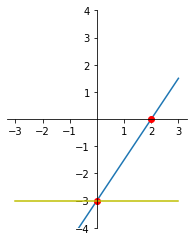

In [36]:
# slope (m) and intercept (b)
m, b = 1.5, -3

ax = plt.gca()

ys = m * xs + b
ax.plot(xs, ys)

ax.set_ylim(-4, 4)
high_school_style(ax) # helper from mlwpy.py
ax.plot(0, -3, 'ro')  # y-intercept
ax.plot(2,  0, 'ro')  # two steps right gives three steps up

# y = mx + b with m=0 gives y = b
ys = 0*xs + b
ax.plot(xs, ys, 'y');

Since our slope is 1.5, taking two steps to the *right* results in gaining three steps *up*.  With a *line* we set the slope of the line *m* to 0 and we are all of a sudden back to a constant.  Constants are horizontal lines, as the yellow line above shows.  

We can combine our ideas about `np.dot` with ideas about lines and write some slightly different code to draw this graph.  Instead of using the pair (*m, b*), we can write an array of values *w* = ($w_1, w_0$).  The trick here is to put the $w_0$ second so it lines up with the $b$.  That's how it is usually written in mathese: the $w_0$ is the constant.

With the *w*s, we can use `np.dot` *if* we augment our `xs` with an extra column of ones.  The augmented version of `xs` is `xs_p1` which stands for 'exs plus a column of ones.'  The column of ones serves the role of the 1 in $ y = mx + b$.  If we rewrite this as $y = mx + b = mx + b \bullet 1$ we can get this in a form to make `np.dot` happy, because `np.dot` wants to multipley *something* times $w_1$ and *something* times $w_0$.  We make sure that whatever gets multiplied by $w_0$ is a 1.

This process of tacking on a column of ones is known as the *plus-one trick* or *+1 trick*.

In [38]:
# np.c_[] lets us create an array column-by-column

xs = np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]

# view the first few rows
display(pd.DataFrame(xs_p1).head())

,0,1
0,-3.0000,1.0000
1,-2.9394,1.0000
2,-2.8788,1.0000
3,-2.8182,1.0000
4,-2.7576,1.0000


Now, we can combine our data and our weights very concisely:

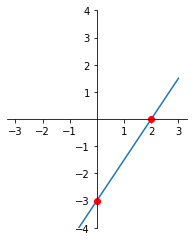

In [40]:
w = np.array([1.5, -3])
ys = np.dot(xs_p1, w)

ax = plt.gca()
ax.plot(xs, ys)

# styling
ax.set_ylim(-4, 4)
high_school_style(ax)
ax.plot(0, -3, 'ro') # y-intercept
ax.plot(2,  0, 'ro'); # two steps to the right should be three whole steps up

Here are the two forms we used in the code: `ys = m*xs + b` and `ys = np.dot(xs_p1, w)`.  Mathematically, these look like $y = mx + b$ and $y = wx^+$.  Here, I'm using $x^+$ as an abbreviation for the *x* that has ones tacked on to it.  The two forms defining `ys` mean the same thing.  They just have some differences when we implement them.  The first form has each of the components standing on its own.  The second form requires $x^+$ to be augmented with a 1 and allows us to conveniently use the dot product.

### 2.6.2 Beyond Lines

We can extent the concept of lines in at least two ways.  We can progress to wiggly curves and polynomials--equations like $f(x) = x^3 + x^2 + x + 1$.  Here, we have a *more complex computation on *one input value x*.  Or, we can go down the road to multiple dimensions: planes, hyperplanes, and beyond! For example, in $f(x, y, z) = x + y + z$ we have *multiple input values we combine together.* 

Considering the second example, suppose we have more than one kind of item we want to purchase at a rock concert, like beverages, (i.e. root beer) in addition to tickets.  Now, we need a new formula, with `rb` standing for root beer.

$ total\_cost = ticket\_cost \times number\_people + rb\_cost \times number\_rbs + parking\_cost $

If we plug in some known values for parking cost, cost per ticket, and cost per root beer, then we have something more concrete:

$ total\_cost = 80 \times number\_people + 10 \times number\_rbs + 40 $

With one item, we have a simple @D plot of a line where one axis direction comes from the input 'how many people' and the other comes from the output 'total cost'.  With two items, we now have two *how many's* but still only one `total_cost`, for a total of three dimensions.  Fortunately, we can still draw that somewhat reasonably.  First, let's create some data:

In [52]:
number_people = np.arange(1, 11) # 1-10 people
number_rbs    = np.arange(0, 20) # 0-19 rootbeers

# numpy tool to get cross-product of values (each against each)
# in two paired arrays.  try it out: np.meshgrid([0, 1], [10, 20])
# 'perfect' for functions of multiple variables
number_people, number_rbs = np.meshgrid(number_people, number_rbs)

total_cost = 80 * number_people + 10 * number_rbs + 40
total_cost

array([[ 120,  200,  280,  360,  440,  520,  600,  680,  760,  840],
       [ 130,  210,  290,  370,  450,  530,  610,  690,  770,  850],
       [ 140,  220,  300,  380,  460,  540,  620,  700,  780,  860],
       [ 150,  230,  310,  390,  470,  550,  630,  710,  790,  870],
       [ 160,  240,  320,  400,  480,  560,  640,  720,  800,  880],
       [ 170,  250,  330,  410,  490,  570,  650,  730,  810,  890],
       [ 180,  260,  340,  420,  500,  580,  660,  740,  820,  900],
       [ 190,  270,  350,  430,  510,  590,  670,  750,  830,  910],
       [ 200,  280,  360,  440,  520,  600,  680,  760,  840,  920],
       [ 210,  290,  370,  450,  530,  610,  690,  770,  850,  930],
       [ 220,  300,  380,  460,  540,  620,  700,  780,  860,  940],
       [ 230,  310,  390,  470,  550,  630,  710,  790,  870,  950],
       [ 240,  320,  400,  480,  560,  640,  720,  800,  880,  960],
       [ 250,  330,  410,  490,  570,  650,  730,  810,  890,  970],
       [ 260,  340,  420,  500,  5

We can look at the data from a few different angles.  Below we show the same graph from five different view points.  Notice they they are all flat surfaces, but the apparent tilt or slope of the surface looks different from different perspectives.  The flat surface is called a plane.

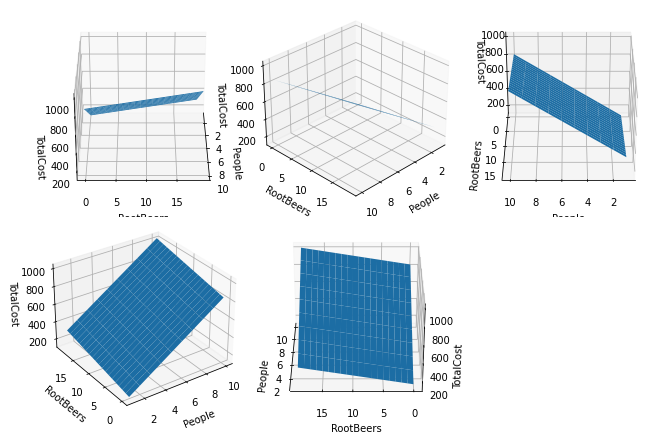

In [55]:
# import need for 'project':'3d'
from mpl_toolkits.mplot3d import Axes3D
fig,axes = plt.subplots(2, 3,
                       subplot_kw={'projection':'3d'},
                       figsize=(9,6))
angles = [0, 45, 90, 235, 180]
for ax,angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.set_xlabel('People')
    ax.set_ylabel('RootBeers')
    ax.set_zlabel('TotalCost')
    ax.azim = angle
    
# we don't use the last axis
axes.flat[-1].axis('off')
fig.tight_layout()

It is pretty straightforward, in code and in mathematics, to move beyond three dimensions.  If, however, we try to plot it out, it gets messy.  Therefore, we can make a table of the outcomes.  Here's an example that also includes some food for the convert goers.  We'll chow on some hotdogs at $5 per hotdog:

$ total\_cost = 80 \times number\_people + 10 \times number\_rbs + 5 \times number\_hotdogs + 40 $

We use a few simple values for the counts of things in our concert-going system.

In [64]:
number_people   = np.array([2, 3])
number_rbs      = np.array([0, 1, 2])
number_hotdogs  = np.array([2, 4])

costs = np.array([80, 10, 5])

columns = ['People', 'RootBeer', 'HotDogs', 'TotalCost']

I pull off combining several `numpy` arrays in all possible combinations, similar to what `itertools`'s `combinations` function does, with a helper `np_cartesian_product`.  It involves a bit of black magic, so I've hidden it in `mlwpy.py`.  Feel free to investigate, if you dare.

In [60]:
counts = np_cartesian_product(number_people,
                              number_rbs,
                              number_hotdogs)

totals = (costs[0] * counts[:, 0] +
          costs[1] * counts[:, 1] + 
          costs[2] * counts[:, 2] + 40) 

display(pd.DataFrame(np.c_[counts, totals],
                     columns=columns).head(8))

,People,RootBeer,HotDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


The assignment to `totals` in the above cell can be imporved using dot product since we are adding several things up and the things we are adding come from being multiplied together element-wise.

In [63]:
costs = np.array([80, 10, 5])
counts = np_cartesian_product(number_people,
                              number_rbs,
                              number_hotdogs)

totals = np.dot(counts, costs) + 40
display(pd.DataFrame(np.column_stack([counts, totals]),
                    columns=columns).head(8))

,People,RootBeer,HotDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


Using the dot product gets us two wins: (1) the line of code that assigns to `total` is drastically improved and (2) we can more or less arbitrarily extend our costs and counts *without modifying our calculating code at all*.  You might notice that I tacked the +40 on there by hand.  That's because I didn't want to go back to the +1 trick--but I could have.

Incidentally, here's what would have happened in a math class.  As we saw with the code-line compression from repeated additions to `dot`, details often get abstracted away or moved behind the scenes when we break out advanced notation.  Here's a detailed breakdown of what happened.  First, we abstract by removing detailed variable names and then replacing our known values by generic identifiers:

$ y = 80x_3 + 10x_2 + 5x_1 + 40 $
$ y = w_3x_3 + w_2x_2 + w_1x_1 + w_0 \bullet 1 $

We take this one step further in code by replacing the *wx* sums with a dot product:

$ y = w_{[3, 2, 1]} \bullet x + w_0 \bullet 1 $

The weird [3, 2, 1]  subscript on the *w* indicates that we aren't using *all* of the weights.  Namewaly, we are *not using* the $w_0$ in the left-hand term. $w_0$ is in the right-hand term multiplying 1.  It is only being used once.  The final *coup de grace* is to perform the +1 trick:

$$ y = wx^+ $$

To summarize, instead of $ y = w_3x_3 + w_2x_2 + w_1x_1 + w_0, $ we can write $ y = wx^+ $.

# 2.7 Notation and the Plus-One Trick

Now that you know what the plus-one trick is, we will discuss a few different ways to talk about tables of data.  The data might be ade of values, such as our expense sheet for the trip to the ball back.  We can take the table and draw brackets around it.

# 2.8 Getting Groovy, Breaking the Straight-Jacket, and Nonlinearity

We just took a line and extended it past its comfort zone, by *adding new variables,* which represented new graphical dimensions.  We went from talking about lines to talking about planes and their higher-dimensional cousins.

Instead of adding new variables or features, we can add complexity to the information.  For example, we might move from $y = 3$ to $y = 2x + 3$ to $y = x^2 + 2x + 3.$  In each case, we add a term to the equation, which causes the line to change from flat, to sloped, to a parabola.  The key point is that we still only have *one* input variable, which we are using in different ways.

Mathematicians call these extensions *higher-order* or *higher-power terms* of the original variable to the equation.  There are a variety of names for the new functions: constant, linear, quadratic, cubic, etc.  Usually, we can call them *n*-th degree polynomials, where *n* is the highest non-zero power in the expression.  For example, $y = x^2 + x + 1$ is also called a quadratic polynomial.

`np.poly1d` gives us an easy helper to define polynomials by specifying the leading coefficients on each term in the polynomial.  For example, we specify $2x^2 + 3x + 4$ by passing in a list of `[2, 3, 4]`.  We'll use some random coefficients to get some interesting curves.

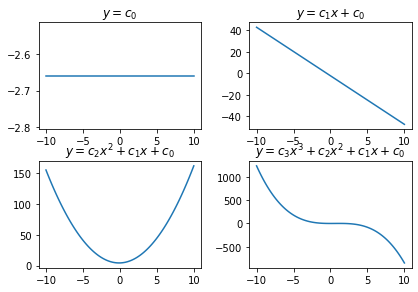

In [66]:
fig, axes = plt.subplots(2, 2)
fig.tight_layout()

titles = ["$y=c_0$",
          "$y=c_1x+c_0$",
          "$y=c_2x^2+c_1x+c_0$",
          "$y=c_3x^3+c_2x^2+c_1x+c_0$"]

xs = np.linspace(-10, 10, 100)
for power, (ax, title) in enumerate(zip(axes.flat, titles), 1):
    coeffs = np.random.uniform(-5, 5, power)
    poly = np.poly1d(coeffs)
    ax.plot(xs, poly(xs))
    ax.set_title(title)

Massaging the general forms of these equations towards our earlier linear equation, we get $y_2 = c_2x^2 + c_1x^1 + c_0x^0 = \Sigma_{i=0}^{2}c_ix^i$

We can turn the equation into code by breaking up the $x_i$ and the coefficients $c_i$ and then combining them with a `np.dot`.

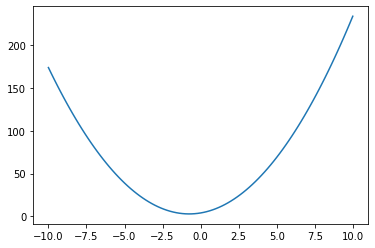

In [72]:
plt.Figure((2, 1.5))

xs = np.linspace(-10, 10, 101)
coeffs = np.array([2, 3, 4])
ys = np.dot(coeffs, [xs**2, xs**1, xs**0])

# nice parabola via a dot product
plt.plot(xs, ys)

# 2.9 NumPy versus "all the maths"

`np.dot` multiplies things element-wise and then adds them up. 

In [73]:
oned_vec = np.arange(5)
print(oned_vec, '-->', oned_vec * oned_vec)
print('self dot:', np.dot(oned_vec, oned_vec))

[0 1 2 3 4] --> [ 0  1  4  9 16]
self dot: 30


The result is the sum of squares of that array.  Here's a simple example using a row and a column.

In [74]:
row_vec = np.arange(5).reshape(1, 5)
col_vec = np.arange(0, 50, 10).reshape(5, 1)

Notice that `row_vec` is shaped like a single example and `col_vec` is shaped like a single feature.

In [76]:
print('row vec:', row_vec,
      'col vec:', col_vec,
      'dot:', np.dot(row_vec, col_vec), sep='\n')

row vec:
[[0 1 2 3 4]]
col vec:
[[ 0]
 [10]
 [20]
 [30]
 [40]]
dot:
[[300]]


So, far, so good.  But what happens if we swap the order? You might expect to get the same answer: after all, in basic arithmetic $3 \times 5 = 5 \times 3.$  Let's try it out:  

In [77]:
out = np.dot(col_vec, row_vec)
print(out)

[[  0   0   0   0   0]
 [  0  10  20  30  40]
 [  0  20  40  60  80]
 [  0  30  60  90 120]
 [  0  40  80 120 160]]


What happened here.  Let's focus on one output element the `20` in the second-from-the-top row.  

We never really defined how the output is produced, besides saying that it does a sum product on two 1D arrays.  

Pick an element in the output, `out[1, 2]`.  That's row 1 and column 2.  It has the value of `20`.  Where does the 20 come from? It comes from taking a 
dot product on row 1 of `col_vec` with column 2 of `row_vec`.  That's actually *the definition* of what `np.dot` does.  The source values are `col_vec[1, :]`, which is `[10]` and `row_vec[:, 2]`, which is `[2]`.  Putting those together gives $ 10 \times 2 \rightarrow 20$ with no additional summing needed because we only have one value in each.  You can go through a similar process for the other entries.

Mathematically, this is written as $out_{ij} = dot(left_i., right_j.)$ where dot is our friendly sum product over 1D things.  So, the output row *i* comes from the left input's row *i* and the output's column *j* comes from the right input column *j*.  Taking from each row and each column gives a $5 \times 5$ result.  If we apply the same logic to the row-column case, we see 





In [79]:
out = np.dot(row_vec, col_vec)
out

array([[300]])

The result is $1 \times 1$, so `out[0, 0]` comes from row 0 of `row_vec` and column 0 of `col_vec`.  Which is exactly the sum product over `[0, 1, 2, 3, 4]` and `[0, 10, 20, 30, 40]`, which gives us `0*0 + 1*10 + 2*20 + 3*30 + 4*40`.

# 2.9.1 Back to 1D versus 2D

However, when we use a mix of 1D and 2D inputs, things are more confusing because the input arrays are not taken at face value.  There are two important consequences for us: (1) the order matters in multiplying a 1D and a 2D array and (2) we have to investigate the rules `np.dot` follows for handling the 1D array.

In [80]:
col_vec = np.arange(0, 50, 10).reshape(5, 1)
row_vec = np.arange(0, 5).reshape(1, 5)
oned_vec = np.arange(5)

np.dot(oned_vec, col_vec)

array([300])

If we trade the order, Python blows up on us:

In [81]:
try:
    np.dot(col_vec, oned_vec) # *boom*
except ValueError as e:
    print('I went boom:', e)

I went boom: shapes (5,1) and (5,) not aligned: 1 (dim 1) != 5 (dim 0)


So, `np.dot(oned_vec, col_vec)` works and `np.dot(dol_vec, oned_vec)` fails.  If we look at the shapes of the guilty parties, we get a sense of where things break down.

In [82]:
print(oned_vec.shape, col_vec.shape, sep='\n')

(5,)
(5, 1)


You might consider the following exercise: create a 1D `numpy` array and look at its shape using `.shape`.  Transpose it with `.T`.  Look at the resulting shape.  Now repeat with a 2D array.  These might not be entirely what you were expecting.

`np.dot` is particular about how these shapes align.  Let's look at the row cases:

In [83]:
print(np.dot(row_vec, oned_vec))
try: print(np.dot(oned_vec, row_vec))
except: print('boom')    

[30]
boom


| form | left-input | right-input | success? |
| --- | --- | --- | --- |
| `np.dot(oned_vec, col_vec)` | (5,) | (5,1) | works
| `np.dot(col_vec, oned_vec)` | (5, 1) | (5,) | fails
| `np.dot(row_vec, oned_vec)` | (1, 5) | (5,) | works
| `np.dot(oned_vec, row_vec)` | (5,) | (1, 5) | fails

For the working cases, we can see what happens if we force-reshape the 1D array:

In [85]:
print(np.allclose(np.dot(oned_vec.reshape(1, 5), col_vec), 
                  np.dot(oned_vec,               col_vec)),
      np.allclose(np.dot(row_vec, oned_vec.reshape(5, 1)),
                  np.dot(row_vec, oned_vec)))

True True


For the cases that work, the 1D array is bumped up to (1, 5) if it is on the left and to (5, 1) if it is on the right.  Basically, the 1D receives a placeholder dimension on the side it shows up in the `np.dot`.  Note that bumping is *not* using NumPy's full, generic broadcasting mechanism between the two inputs; it is more of a special case.

Broadcasting two arrays against each other in NumPy will result *in the same shape* whether you are broadcasting `a` against `b` or `b` against `a`.  Even so, you can *mimic* `np.dot(col_vec, row_vec)` with broadcasting and multiplication.  If you do that, you get the 'big array' result: it's called an *outer product*.

The following shows why we care:


In [93]:
D = np.array([[1, 3],
              [2, 5],
              [2, 7],
              [3, 2]])
w = np.array([1.5, 2.5])

This works:

In [94]:
np.dot(D, w)

array([ 9. , 15.5, 20.5,  9.5])

In [95]:
D.shape

(4, 2)

In [96]:
w.shape

(2,)

In [88]:
try:
    np.dot(w, D)
except ValueError:
    print('Boom. :sadface:')

Boom. :sadface:


What do we do if we don't like the interface we are given? If we are willing to (1) maintain, (2) support, (3) document, and (4) test an alternative, then we can make an interface that we prefer.  Usually people only think about the implementation step.  That's a costly mistake.

Here is a version of `dot` that plays nicely with a 1D input as the first argument that is shaped like a column:

In [90]:
def rdot(arr, brr):
    'reversed-argument version of np.dot'
    return np.dot(brr, arr)
rdot(w, D)

array([ -7.5, -12. , -18. ,  -1.5])

When we want our code to match the math, we'll use `rdot`, short for "reversed arguments to `np.dot`"--when we want our code to match the mathc.

Dot products are ubiquitous in the mathematics of learning systems.  Since we are focused on investigating learning systems through Python programs, it is *really important* that we (1) understand what is going on with `np.dot` and (2) have a convenient and consistent form for using it.  We'll use `rdot` in our material on linear and logistic regression.  

# 2.10 Floating-Point Issues

Prepare yourself to be grumpy.

In [99]:
1.1 + 2.2 == 3.3

False

In thePython code above, all of the values are `floats`:

In [100]:
type(1.1), type(2.2), type(1.1+2.2), type(3.3) 

(float, float, float, float)

Here are a few facts:

1. Computer memory is finite.  We can't physically store an infinite number of digits for any numerical value.
2. Some numbers have an infinite number of decimal places ($\frac{1}{9}$ and $\pi$)
3. Computers store all their information using bits, that's base-2 numbers, also known as *binary*.
4.  There are *different* infinit-digit numbers when we write them in decimal versus binary.

We have to *approximate* the values we store.  We can get *close*, but we can never be *exact*.  Because of points three and four, when we convert from a seemingly innocent decimal number like `3.3` to binary, it becomes more complicated, since it might have repeating digits.  We cannot *rely on exact comparisons for floating-point values*.  However, we can ask if the values are *close enough*.

In [101]:
np.allclose(1.1 + 2.2, 3.3)

True

Here, `numpy` is checking if the numbers are the same for many, many decimal places--out to the point where the difference is insignificant.  If we care, we can define our own tolerance for what is and is not significant.